# Figure 1: A new self-initiated foraging task to study utility-driven modulations of vigor in running rats.

## setup and imports

In [1]:
import matplotlib.pyplot as plt
import fnmatch
import numpy as np
import glob
from scipy.ndimage import gaussian_filter as smooth

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


### plot colors and markers for rats

In [3]:
# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

rat_markers = {}
m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', ]
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', ]
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

# Define the example session to be shown
animal='RatM00'
session='RatM00_2021_07_22_16_13_03'

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# 1A task rule schematic

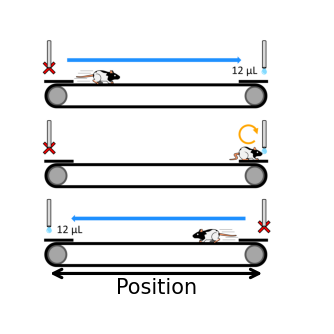

In [4]:
def Figure1A(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "Figures/1A.png"

    try:
        img = plt.imread(path)
        ax.imshow(img)
    except FileNotFoundError:
        print("Image not found")
    ax.axis("off")

    ax.annotate(text='', xy=(150, 3150), xytext=(3100, 3150), arrowprops=dict(arrowstyle='<->', lw=0.75, color='k'), fontsize=5, zorder=5)
    
    ax.annotate(text='Position', xy=(0, 0), xytext=((150+3100)/2, 3200), ha='center', va='top', xycoords='data', fontsize=5, zorder=5)


fig, ax = plt.subplots(1, 1, figsize=(1, 1))
Figure1A(ax=ax)

# 1B Example session

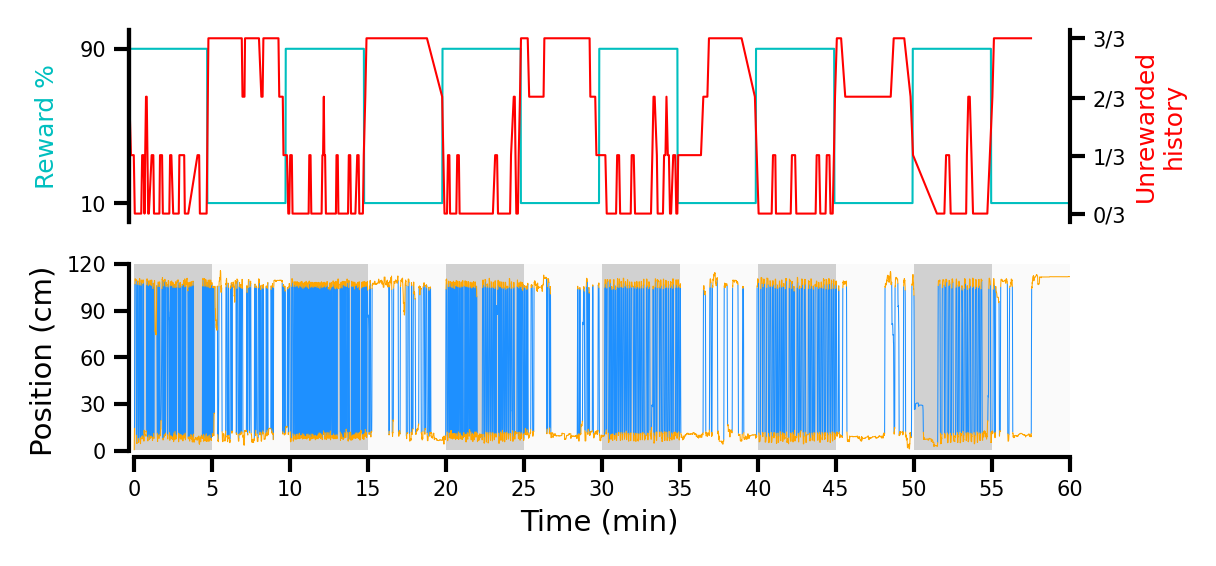

In [5]:

def Figure1B(root, 
            animal='RatM00', session='RatM00_2021_07_22_16_13_03', 
            ax=None):
    '''
    read position file and plot animal trajectory
    '''
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize = (cm2inch(10), cm2inch(4.5)))

    params = get_from_pickle(root, animal, session, name="params.p")
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    mask = stitch([get_from_pickle(root, animal, session, name="mask.p")])[0]   
    pos = smooth(pos.astype('float32'), 2)

    running_Xs = [val[0] if val[1] == True else None for val in [[i, j] for i, j in zip(pos, mask)]]
    idle_Xs = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(pos, mask)]]

    for i in range(0, len(params['blocks'])):
        ax.axvspan(params['blocks'][i][0], params['blocks'][i][1], ymin=1/30, ymax=1,
                    color='grey', alpha=params['rewardProbaBlock'][i]/250, linewidth=0)

    ax.plot(time, running_Xs, color="dodgerblue", lw=.25)
    ax.plot(time, idle_Xs, color="orange", lw=.25)

    ax.set_xlim(0, 3600)
    ax.set_ylim(0, 120)
    ax.set_xticks(np.arange(0, 3601, 300))
    ax.set_xticklabels(np.arange(0, 61, 5))
    ax.set_yticks(np.arange(0, 121, 30))
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Position (cm)")
    space_axes(ax, x_ratio_right=0, x_ratio_left=1/180)


def Figure1Bbis(root, 
            animal='RatM00', session='RatM00_2021_07_22_16_13_03', 
            ax=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    params = get_from_pickle(root, animal, session, name="params.p")
    seq = get_from_pickle(root, animal, session, name="sequence.p")

    time = np.arange(0, 3600, 1)
    rewardProba = np.ones(3600)

    for t in range(0, len(time)):
        for i in range(0, len(params['blocks'])):
            if time[t] in range(params['blocks'][i][0], params['blocks'][i][1]):
                rewardProba[t] *= params['rewardProbaBlock'][i]

    ax.plot(time, rewardProba, color='c', lw=.5)

    time_of_reward = []
    received_reward = []
    for elem in seq:
        if seq[elem][1] == 'run':
            time_of_reward.append(seq[elem][0])
            received_reward.append(seq[elem][2])

    ax2 = ax.twinx()
    # turn ax 2 frame on
    ax2.spines['right'].set_visible(True)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_yticks([0, 0.33, 0.66, 1])
    ax2.set_yticklabels(["0/3", "1/3", "2/3", "3/3"])
    ax2.set_ylabel('Unrewarded\nhistory', color='r', fontsize=6)
    ax2.plot(time_of_reward, abs(1 - movinavg(received_reward, 3)), 'r', lw=.5)

    ax.set_xlim(0, 3600)
    ax.set_ylim(0, 100)
    ax.set_yticks([10, 90])
    ax.set_yticklabels(["10", "90"])
    ax.set_ylabel("Reward %", labelpad=5, fontsize=6, color='c')
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


fig, axs = plt.subplots(2, 1, figsize = (cm2inch(10), cm2inch(4.5)))
Figure1B(ax=axs[1], root=root)
Figure1Bbis(ax=axs[0], root=root)

# 1C Definitions of run and inter-run periods.

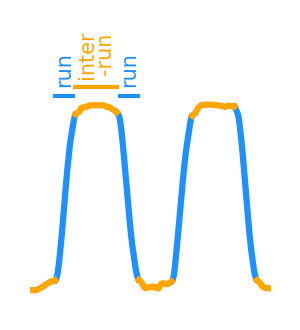

In [6]:
def Figure1C(root, 
            animal='RatM00', session='RatM00_2021_07_22_16_13_03',
            ax=None):
    '''
    read position file and plot animal trajectory
    '''
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    mask = stitch([get_from_pickle(root, animal, session, name="mask.p")])[0]   
    pos = smooth(pos.astype('float32'), 2)

    running_Xs = [val[0] if val[1] == True else None for val in [[i, j] for i, j in zip(pos, mask)]]
    idle_Xs = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(pos, mask)]]

    ax.plot(time, running_Xs, label="run", color="dodgerblue", lw=1.5)
    ax.plot(time, idle_Xs, label="wait", color="orange", lw=1.5)

    time_run_1 = np.arange(3247.56, 3248.96, 0.04)
    time_run_2 = np.arange(3252.76, 3254.28, 0.04)
    time_inter_run = np.arange(3249.16, 3252.56, 0.04)

    ax.plot(time_run_1, np.ones(len(time_run_1))*115, color='dodgerblue', lw=1)
    ax.plot(time_run_2, np.ones(len(time_run_2))*115, color='dodgerblue', lw=1)
    ax.plot(time_inter_run, np.ones(len(time_inter_run))*120, color='orange', lw=1)

    ax.text((3249.16+3252.56)/2, 125, 'inter\n-run', ha="center", va="bottom", rotation=90, size=5, color='orange', linespacing=0.85, multialignment='center')
    ax.text((3247.56+3248.96)/2, 120, 'run', ha="center", va="bottom", rotation=90, size=5, color='dodgerblue')
    ax.text((3252.76+3254.28)/2, 120, 'run', ha="center", va="bottom", rotation=90, size=5, color='dodgerblue')

    ax.set_xlim(3245.5, 3265)
    ax.set_ylim(0, 140)
    ax.axis('off')

fig, ax = plt.subplots(1, 1, figsize = (cm2inch(2.25), cm2inch(2.5)))
Figure1C(ax=ax, root=root)

# 1D Duration of inter-runs example animal

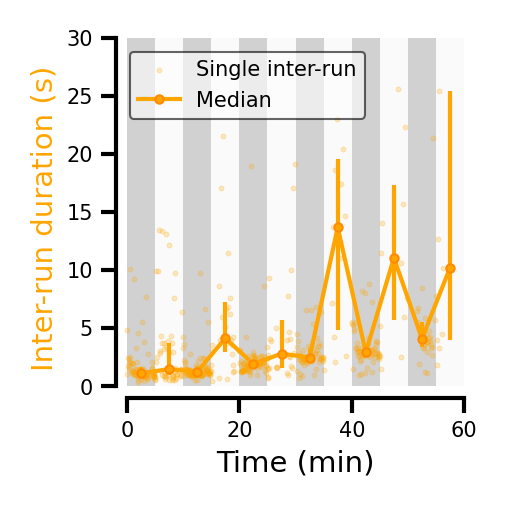

In [7]:

def Figure1D(root, 
             animal='RatM00', session='RatM00_2021_07_22_16_13_03', 
             
             ax=None):
    
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()

    params = get_from_pickle(root, animal, session, name="params.p")
    blocks = params['blocks']
    rewardProbaBlock = params['rewardProbaBlock']
    example_idleTimeInLeftBin, example_idleTimeInRightBin = get_from_pickle(root, animal, session, name="timeinZone.p")
    data = [example_idleTimeInLeftBin[i]+example_idleTimeInRightBin[i] for i in range(0, 12)]

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    data_medians = [np.median(data[i]) for i in range(12)]
    data_bot_percentiles = [np.percentile(data[i], 25) for i in range(12)]
    data_top_percentiles = [np.percentile(data[i], 75) for i in range(12)]
        
    ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                data_medians,
                yerr=[[data_medians[i]-data_bot_percentiles[i] for i in range(12)], [data_top_percentiles[i]-data_medians[i] for i in range(12)]],
                marker='o', ms=2, color='orange', ecolor='orange',
                zorder=4, markeredgecolor='darkorange', markeredgewidth=0.5, alpha=1)

    ax.plot([-100, -101], [-100, -101], marker='o', ms=2, color='orange',
                zorder=4, markeredgecolor='darkorange', markeredgewidth=0.5, alpha=1, label='Median')

    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Inter-run duration (s)", color='orange')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 30)

    _x, _y = [], []
    sequence = get_from_pickle(root, animal, session, name="sequence.p")
    for elem in sequence: 
        if sequence[elem][1]=='stay':
            _x.append(sequence[elem][0]/60)
            _y.append(sequence[elem][3])

    ax.scatter(_x, _y, marker='o', s=.15, color='orange', zorder=3, label='Single inter-run', alpha=0.33)


    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique[::-1]), loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=True, fontsize=5, markerscale=1, edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)
    space_axes(ax)


fig, ax = plt.subplots(1, 1, figsize = (cm2inch(4), cm2inch(4)))
Figure1D(ax=ax, root=root)

# 1D Duration of runs example animal

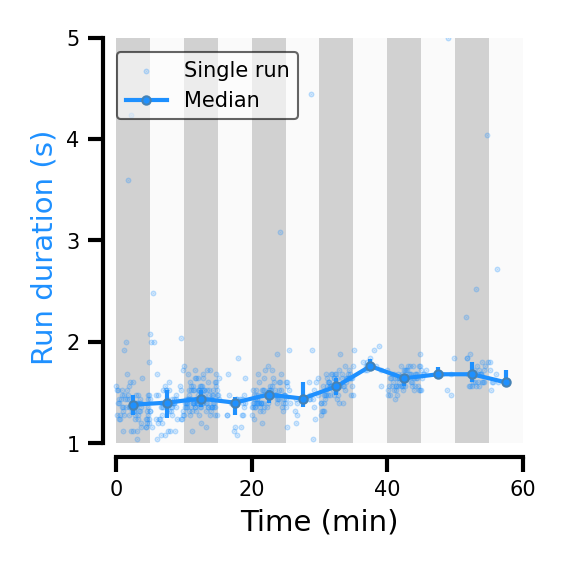

In [8]:
def Figure1E(root, 
             animal='RatM00', session='RatM00_2021_07_22_16_13_03', 
             ax=None):
    
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()

    params = get_from_pickle(root, animal, session, name="params.p")
    blocks = params['blocks']
    rewardProbaBlock = params['rewardProbaBlock']
    example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")
    data = [example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)]

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    data_medians = [np.median(data[i]) for i in range(12)]
    data_bot_percentiles = [np.percentile(data[i], 25) for i in range(12)]
    data_top_percentiles = [np.percentile(data[i], 75) for i in range(12)]
        
    ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                data_medians,
                yerr=[[data_medians[i]-data_bot_percentiles[i] for i in range(12)], [data_top_percentiles[i]-data_medians[i] for i in range(12)]],
                marker='o', ms=2, color='dodgerblue', ecolor='dodgerblue',
                zorder=4, markeredgecolor='steelblue', markeredgewidth=0.5, alpha=1)

    ax.plot([-100, -101], [-100, -101], marker='o', ms=2, color='dodgerblue',
                zorder=4, markeredgecolor='steelblue', markeredgewidth=0.5, alpha=1, label='Median')

    ax.set_xlim(0, 60)
    ax.set_xlabel("Time (min)")

    ax.set_ylim(1, 5)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_ylabel("Run duration (s)", color='dodgerblue')


    _x, _y = [], []
    sequence = get_from_pickle(root, animal, session, name="sequence.p")
    for elem in sequence: 
        if sequence[elem][1]=='run':
            _x.append(sequence[elem][0]/60)
            _y.append(sequence[elem][3])

    ax.scatter(_x, _y, marker='o', s=.15, color='dodgerblue', zorder=3, label='Single run', alpha=0.33)


    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique[::-1]), loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=True, fontsize=5, markerscale=1, edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)
    space_axes(ax)

fig, ax = plt.subplots(1, 1, figsize = (cm2inch(4.5), cm2inch(4.5)))
Figure1E(ax=ax, root=root)

# 1F Duration of inter-runs all animals

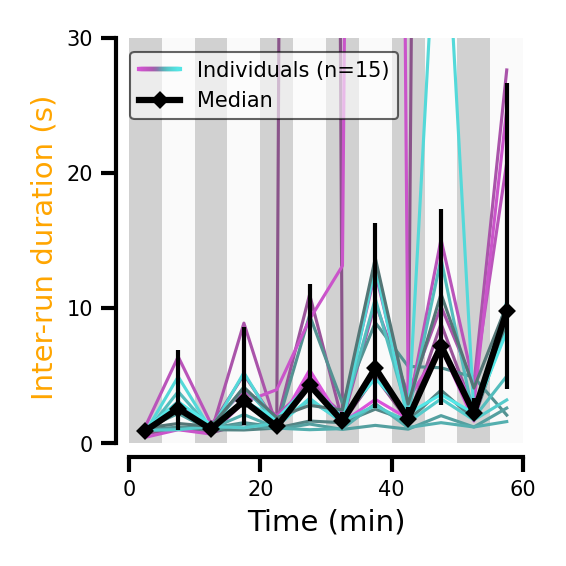

In [9]:
def Figure1F(root, 
             sessionindex=-3, 
             ax=None):
    
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()
        
    median_all_animals = {}
    tops = {}
    bots = {}
    for idx, animal in enumerate(animalList):
        session = matchsession(animal, dist120)[sessionindex]
        params = get_from_pickle(root, animal, session, name="params.p")
        blocks = params['blocks']
        rewardProbaBlock = params['rewardProbaBlock']

        example_idleTimeInLeftBin, example_idleTimeInRightBin = get_from_pickle(root, animal, session, name="timeinZone.p")
        data = [example_idleTimeInLeftBin[i]+example_idleTimeInRightBin[i] for i in range(0, 12)]

        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
                [np.median(data[i]) for i in range(0, len(blocks))],
                color=rat_markers[animal][0], lw=.75,
                zorder=4 if animal == 'RatM00' else 3)
            
        median_all_animals[animal] = [np.nanmedian(data[i]) for i in range(0, len(blocks))]
        tops[animal] = [np.nanpercentile(data[i], 75) for i in range(0, len(blocks))]
        bots[animal] = [np.nanpercentile(data[i], 25) for i in range(0, len(blocks))]

    median_of_median = [np.nanmedian([median_all_animals[animal][i] for animal in animalList]) for i in range(len(blocks))]
    tops = [np.nanmedian([tops[animal][i] for animal in animalList]) for i in range(12)]
    bots = [np.nanmedian([bots[animal][i] for animal in animalList]) for i in range(12)]

    err = []
    for i in range(12):
        err.append([median_of_median[i] - bots[i], tops[i] - median_of_median[i]])
    err = np.array(err).T

    ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], median_of_median, yerr=err, 
                    capsize=0, color='k', marker='D', markersize=2, linestyle='-', lw=1.5, elinewidth=1, zorder=5)

    median = ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)

   
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
        
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Inter-run duration (s)", color='orange')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 30)
    ax.set_yticks([0, 10, 20, 30])

    add_colored_intact(ax, handles=[median], labels=['Median'], text=f'Individuals (n={len(animalList)})')
    space_axes(ax)

fig, ax = plt.subplots(1, 1, figsize = (cm2inch(4.5), cm2inch(4.5)))
Figure1F(ax=ax, root=root)

# 1G Duration of runs all animals

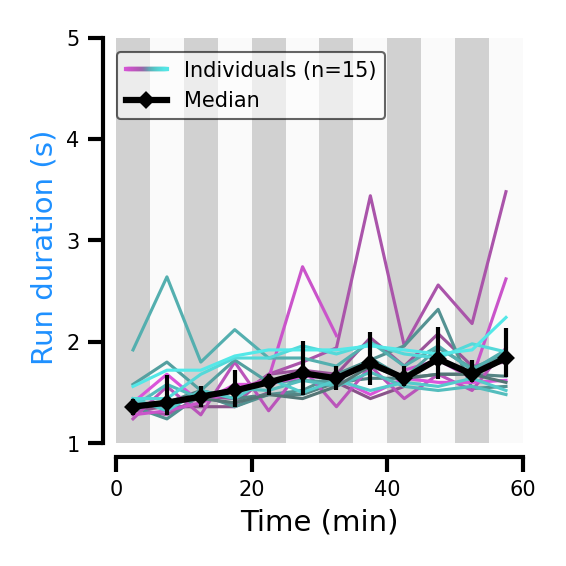

In [10]:
def Figure1G(root, 
             sessionindex=-3, 
             ax=None):
    
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()

    median_all_animals = {}
    tops = {}
    bots = {}
    for idx, animal in enumerate(animalList):
        session = matchsession(animal, dist120)[sessionindex]
        params = get_from_pickle(root, animal, session, name="params.p")
        blocks = params['blocks']
        rewardProbaBlock = params['rewardProbaBlock']
        example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")
        data = [example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)]

        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
                [np.median(data[i]) for i in range(0, len(blocks))],
                color=rat_markers[animal][0], lw=.75,
                zorder=4 if animal == 'RatM00' else 3)
            
        median_all_animals[animal] = [np.nanmedian(data[i]) for i in range(0, len(blocks))]
        tops[animal] = [np.nanpercentile(data[i], 75) for i in range(0, len(blocks))]
        bots[animal] = [np.nanpercentile(data[i], 25) for i in range(0, len(blocks))]

    median_of_median = [np.nanmedian([median_all_animals[animal][i] for animal in animalList]) for i in range(len(blocks))]
    tops = [np.nanmedian([tops[animal][i] for animal in animalList]) for i in range(12)]
    bots = [np.nanmedian([bots[animal][i] for animal in animalList]) for i in range(12)]

    err = []
    for i in range(12):
        err.append([median_of_median[i] - bots[i], tops[i] - median_of_median[i]])
    err = np.array(err).T

    ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], median_of_median, yerr=err, 
                    capsize=0, color='k', marker='D', markersize=2, linestyle='-', lw=1.5, elinewidth=1, zorder=5)

    median = ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)

    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Run duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(1, 5)
    ax.set_yticks([1, 2, 3, 4, 5])

    add_colored_intact(ax, handles=[median], labels=['Median'], text=f'Individuals (n={len(animalList)})')
    space_axes(ax)



fig, ax = plt.subplots(1, 1, figsize = (cm2inch(4.5), cm2inch(4.5)))
Figure1G(ax=ax, root=root)

# Figure 1: A new self-initiated foraging task to study utility-driven modulations of vigor in running rats.

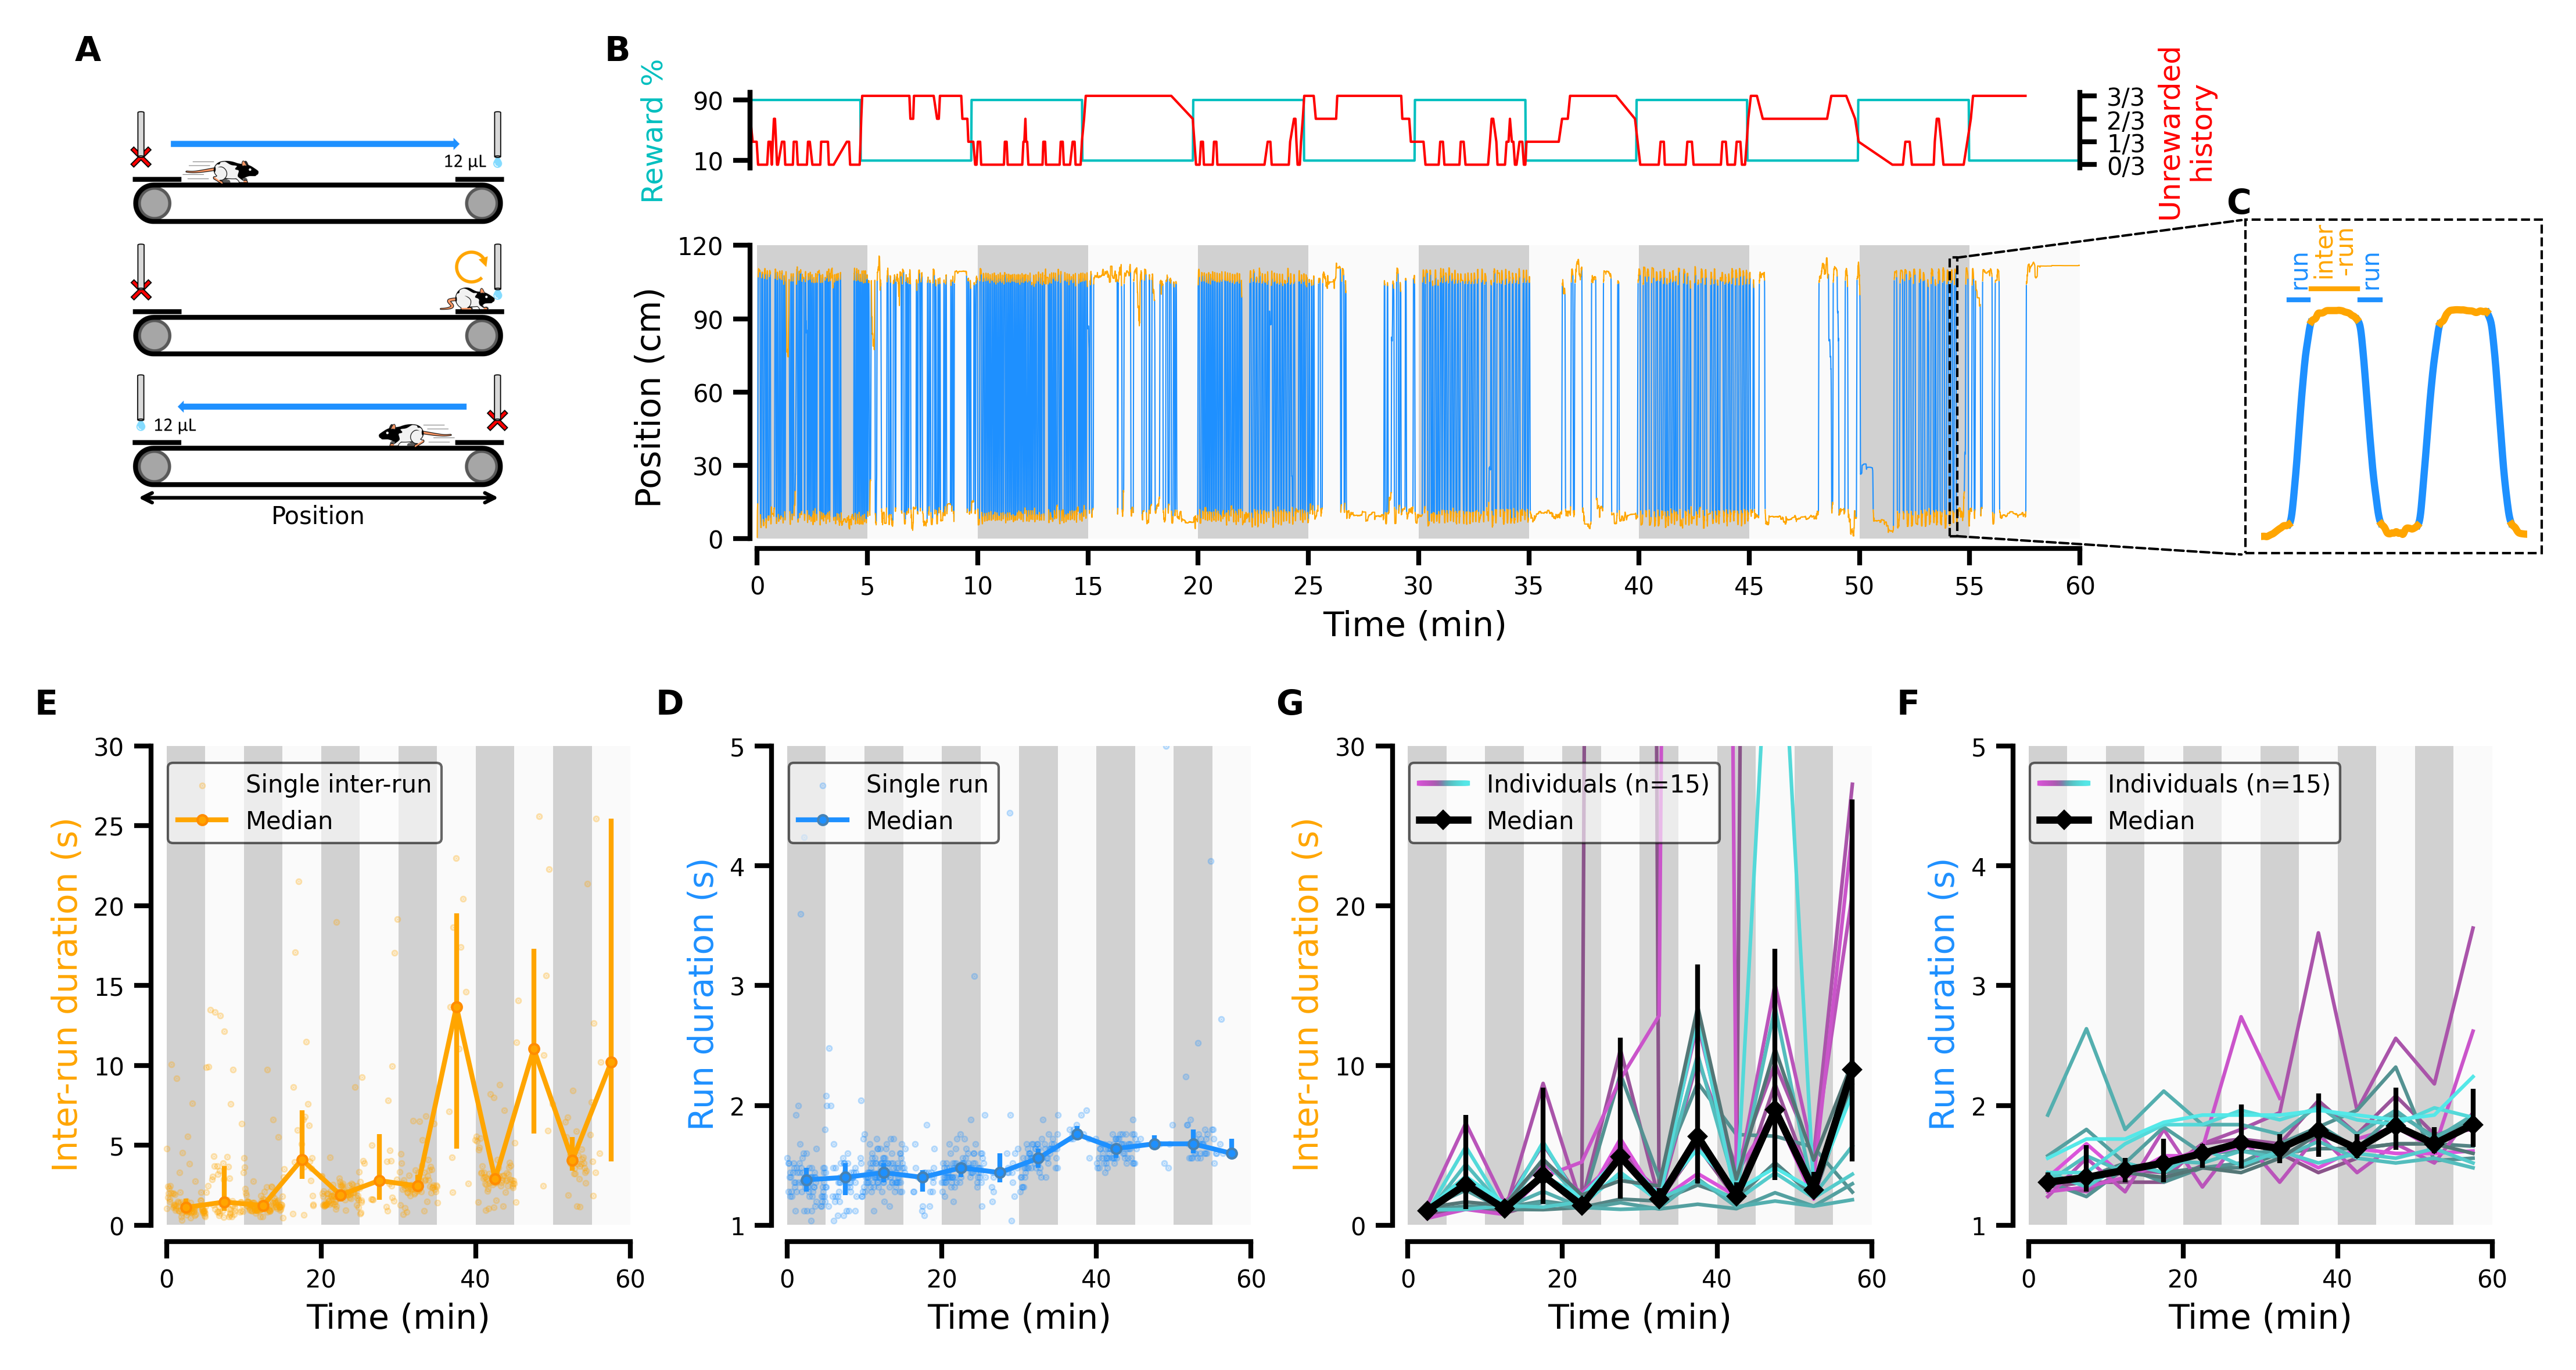

In [11]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(9)), 
               constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(3, 1 , height_ratios=[9, 1, 9], hspace=0.5)

row1 = gs0[0].subgridspec(2, 3, height_ratios=[1, 4], width_ratios=[2, 5, 1])
setup_schematic = plt.subplot(row1[:, 0])
raw_track_track = plt.subplot(row1[1, 1])
raw_track_proba = plt.subplot(row1[0, 1])
zoom_track = plt.subplot(row1[1, -1])

row2 = gs0[2].subgridspec(1, 4, wspace=.5, width_ratios=[1, 1, 1, 1])
run_time_ex_rat = plt.subplot(row2[0, 0])
idle_time_ex_rat = plt.subplot(row2[0, 1])
run_time_all_rats = plt.subplot(row2[0, 2])
idle_time_all_rats = plt.subplot(row2[0, 3])


Figure1A(ax=setup_schematic)
Figure1B(ax=raw_track_track, root=root)
Figure1Bbis(ax=raw_track_proba, root=root)
Figure1C(ax=zoom_track, root=root)
zoomingBox(fig=fig, main_ax=raw_track_track, roi=[3245, 3265.5, 1, 115], 
           zoom_ax=zoom_track, dstForced=[[0.87, 0.595], [0.87, 0.839]])
rect = plt.Rectangle((0.88, 0.61), 0.12, 0.27, fill=False, color="k", 
                     lw=.5, linestyle='--', zorder=11, 
                     transform=fig.transFigure, figure=fig)
fig.patches.extend([rect])

Figure1D(ax=run_time_ex_rat, root=root)
Figure1E(ax=idle_time_ex_rat, root=root)
Figure1F(ax=run_time_all_rats, root=root)
Figure1G(ax=idle_time_all_rats, root=root)


letter_on_subplot(raw_track_proba, "B", x_offset=-250, y_offset=100)
for ax, letter in zip([idle_time_ex_rat, run_time_ex_rat, idle_time_all_rats, run_time_all_rats], ["D", "E", "F", "G"]):
    letter_on_subplot(ax, letter)
for ax, letter in zip([setup_schematic, zoom_track], ["A", "C"]):
    letter_on_subplot(ax, letter, x_offset=-60, y_offset=100)

plt.savefig("./Figures_paper/Figure_1.pdf", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_1.svg", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="svg", dpi=600)